# Effect of the same fault injected at different bits

In [1]:
%matplotlib inline

In [2]:
# For plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# For parsing Matrix files
import scipy.io

import numpy as np

## Import modules

In [3]:
from Experiment import *
from Parameters import *
from Fault import *
from Algorithm import *

## Define inputs

In [4]:
inputs = []

#### Matrice HB/arc130 (https://www.cise.ufl.edu/research/sparse/matrices/HB/arc130.html)

239734.79553
3.95980213558e-06


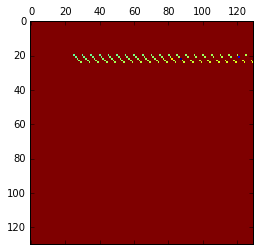

In [5]:
if True:
    A = scipy.io.loadmat('./arc130.mat')['Problem'][0][0][1].toarray()
    n = A.shape[0]
    plt.matshow(A)
    u, s, v = np.linalg.svd(A)
    print s[0]
    print s[-1]
    x = np.ones((n, 1))
    b = A.dot(x)
    x = np.zeros((n, 1))

#### Matrice gre_216a

1.01116601557
0.00981568462302


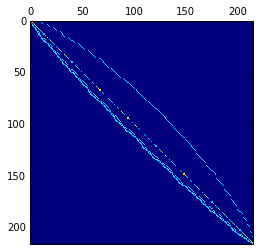

In [6]:
if True:
    A = scipy.io.loadmat('./gre_216a.mat')['Problem'][0][0][1].toarray()
    n = A.shape[0]
    plt.matshow(A)
    u, s, v = np.linalg.svd(A)
    print s[0]
    print s[-1]
    x = np.ones((n, 1))
    b = A.dot(x)
    x = np.zeros((n, 1))
   

In [7]:
inputs += [{"A": A, "b": b, "x0": x}]

## Define the algorithm

In [8]:
import gmres

#### Algorithm parameters

In [9]:
# parameters that won't change during the whole experiment
algorithm_parameters = Parameters()
algorithm_parameters["m"] = n
algorithm_parameters["tol"] = 1.e-12
algorithm_parameters["iterMax"] = n
algorithm_parameters["orthMethod"] = gmres.modified_gramschmidt
algorithm_parameters["dtype"] = 'd'
algorithm_parameters["vulnerable"] = True
algorithm_parameters["save_data"] = {"iteration_count",
                                     "residual",
                                     "residuals",
                                     "true_residual",
                                     "true_residuals",
                                     "orthogonality",
                                     "arnoldi",
                                     "faults",
                                     "H",
                                     "V"}

#### Implementation (gmres)

In [10]:
def implementation(self, input, algorithm_parameters, experiment_parameters):
    gmres.pipelined_p1(self, input, algorithm_parameters, experiment_parameters)

In [11]:
gmres_algorithm = Algorithm(algorithm_parameters, implementation)

## Run the experiment

### Define the experiment parameters

In [12]:
from sys import stdout

experiment_parameters_without_fault = Parameters()
experiment_parameters_without_fault["vulnerable"] = False

orthMethods = []
orthMethods += [gmres.modified_gramschmidt]
orthMethods += [gmres.classical_gramschmidt]
orthMethods += [lambda w, V, H, i: gmres.modified_gramschmidt(w, V, H, i, True)]
  


def experiment_parameters_generator():
    parameters = Parameters()
    parameters["vulnerable"] = True
    
    fault_parameters = {}
    fault_parameters["fault_callback"] = lambda fault: (stdout.write(" %s " % str(fault)))
    fault_parameters["register"] = "left"
    while (True):
        fault_parameters["vulnerable_bits"] = [int(np.random.rand() * 64)]
        fault_parameters["fault_indices"] = {"i": int(np.random.rand()*n), 
                                             "j":0, 
                                             "k":int(np.random.rand()*n)}
        fault_parameters["timer"] = int(np.random.rand() * 150)
        
        parameters["fault_parameters"] = fault_parameters
        
        for i in xrange(64 / 4):
            fault_parameters["vulnerable_bits"] = [min(i * 4, 63)]
            yield parameters



### Setup the experiment (algorithm, parameters and inputs)

In [13]:
# Experiment without fault
F = Experiment(experiment_parameters_without_fault, gmres_algorithm)
F.set_inputs(inputs)
F.run(show_progress=True, n=1)

print F.get_data("faults")

Complete ! 
[[]]


In [14]:
# Experiment with fault
E = Experiment(experiment_parameters_generator(), gmres_algorithm)
E.set_inputs(inputs)
E.run(show_progress=True, n=1)

Complete ! 


## Display the experiment result

In [15]:
E.get_results()[0]

({'A': array([[ 0.75,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
         [ 0.25,  0.5 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
         [ 0.  ,  0.25,  0.5 , ...,  0.  ,  0.  ,  0.  ],
         ..., 
         [ 0.  ,  0.  ,  0.  , ...,  0.5 ,  0.  ,  0.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.25,  0.5 ,  0.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.25,  0.75]]),
  'b': array([[ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.25],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.  ],
         [ 1.25],
         [ 1.

## Display the experiment data

In [16]:
E.get_data()[0]

{'H': array([[ 1.00359609, -0.02545873,  0.02045184, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.05418358,  0.72554107,  0.00673946, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.2919455 ,  0.48436873, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 'V': array([[ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06784535, -0.0045028 ,  0.00168327, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.06784535, -0.0045028 ,  0.0016

## Plot convergence history

In [17]:
def plot_2D(X, Y, title = '', grid = True, label = "", log=False, linestyle = None, xlim = None, ylim = None):

    if log:
        p = plt.semilogy(X, Y[:len(X)], label=label)
    else:
        p = plt.plot(X, Y[:len(X)], label=label)
    if linestyle:
        plt.setp(p, linestyle=linestyle) 
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if xlim:
        plt.xlim(xlim)
    if grid:
        plt.grid(True)


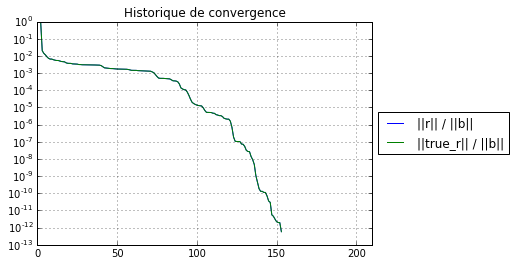

In [18]:
X = np.arange(2, F.get_data('iteration_count')[0]+1)
Y = F.get_data('residuals')[0]
Z = F.get_data('true_residuals')[0]
plot_2D(X, Y, log=True, title='Historique de convergence', label = "||r|| / ||b||", xlim=[0, 200], ylim=[1., 1.e-16])
plot_2D(X, Z, log=True, title='Historique de convergence', label = "||true_r|| / ||b||", xlim=[0, 210], ylim=[1., 1.e-16])

152
152
{'register_before': 0.25, 'loc': {'i': 124, 'k': 158, 'j': 0}, 'value_before': 0.0013864800092510256, 'register': 'left', 'timer': 145, 'register_after': 0.25000000000000006, 'bit': 0, 'value_after': 0.0013864800092510256, 'check': True}


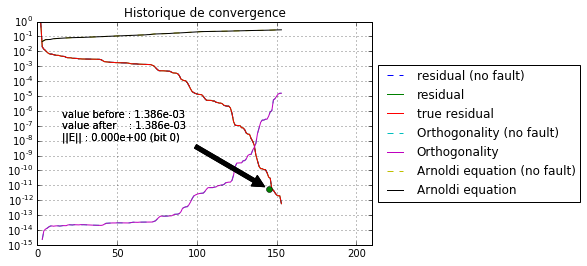

animation


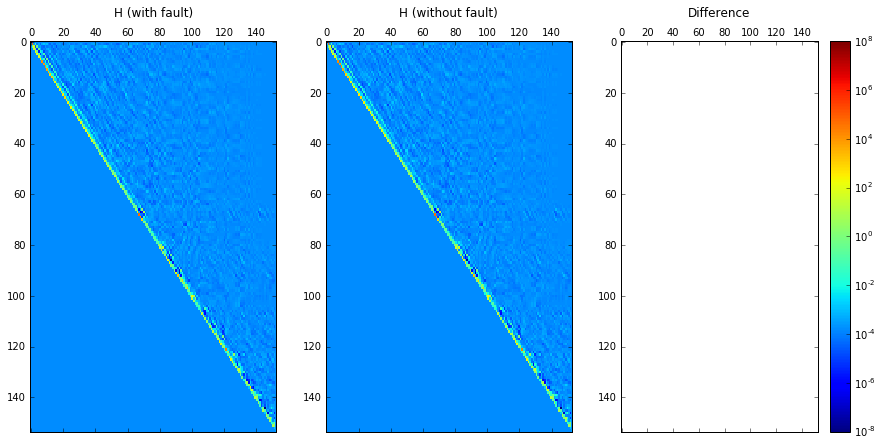

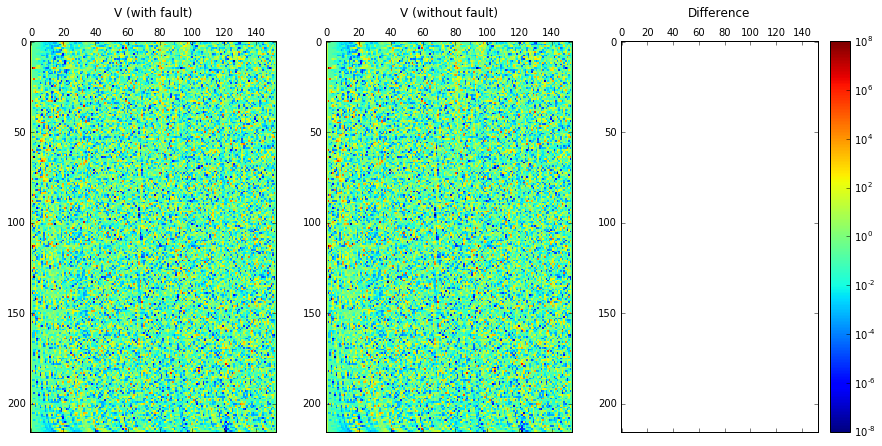

In [19]:
%matplotlib inline

if True:
    
    data = filter(lambda d: len(d["faults"]) > 0, E.get_data())
    data = filter(lambda d: len(d["faults"]) > 0, E.get_data())
    
    data_faults = map(lambda d: d["faults"], data)
    data_faults = map(lambda d: d["faults"], data)
    
    data_H = map(lambda d: d["H"], data)
    data_V = map(lambda d: d["V"], data)
    data_orthogonality = map(lambda d: d["orthogonality"], data)
    data_arnoldi = map(lambda d: d["arnoldi"], data)
    #data_V_ = map(lambda d: d["V_"], data)
    data_iteration = map(lambda d: d["iteration_count"], data)
    data_errors = map(lambda d: d["residuals"], data)
    data_true_errors = map(lambda d: d["true_residuals"], data)
    data_errors_ = map(lambda d: d["residuals"], data)
    data_true_errors_ = map(lambda d: d["true_residuals"], data)
    
    XT = np.arange(2, F.get_data('iteration_count')[0]+1)
    YT = F.get_data('residuals')[0]
    ZT = F.get_data('true_residuals')[0]
    OT = F.get_data('orthogonality')[0]
    AT = F.get_data('arnoldi')[0]
        

    for i in xrange(len(data_faults)):
        X = np.arange(2, data_iteration[i]+1)
        Y = data_errors[i]
        Z = data_true_errors[i]
        O = data_orthogonality[i]
        A = data_arnoldi[i]
        
        xlim = [0, 210]
        ylim = [1.e+2, 1.e-16]
        plot_2D(XT, YT, log=True, title='Historique de convergence', label = "residual (no fault)", linestyle='--', xlim=xlim, ylim=ylim)  
        
        
        plot_2D(X, Y, log=True, title='Historique de convergence', label = "residual", xlim=xlim, ylim=ylim)
        plot_2D(X, Z, log=True, title='Historique de convergence', label = "true residual", xlim=xlim, ylim=ylim)
        
        plot_2D(XT, OT, log=True, title='Historique de convergence', label = "Orthogonality (no fault)", linestyle='--')  
        plot_2D(X, O, log=True, title='Historique de convergence', label = "Orthogonality")
  
        print len(X)
        print len(A)
        plot_2D(XT, AT, log=True, title='Historique de convergence', label = "Arnoldi equation (no fault)", linestyle='--')  
        plot_2D(X, A, log=True, title='Historique de convergence', label = "Arnoldi equation")
 

        x = (data_faults[i][0]['timer'])
        y = data_true_errors[i][x]
        y_ = data_true_errors_[i][x]
        print data_faults[i][0]
        if data_faults[i][0]["check"]:
            c = "green"
        elif data_faults[i][0]["check"] == False:
            c = "yellow"
        else:
            c = "red"
        plt.plot([x], [y], 'ro', c=c)
        #plt.plot([x], [y_], 'ro', c="green" if data_faults[i][0]["check"] else "red")
        annotation = "value before : %.3e \nvalue after    : %.3e \n||E|| : %.3e (bit %d)" % (data_faults[i][0]['value_before'], 
                                                                                               data_faults[i][0]['value_after'], 
                                                                                               abs(data_faults[i][0]['value_before']-data_faults[i][0]['value_after']),
                                                                                               data_faults[i][0]['bit'])
        plt.annotate(annotation, xy=(x, y), xytext=(1. / 10. * data_iteration[i], 1.e-8),
                arrowprops=dict(facecolor='black', shrink=0.05),)
        plt.annotate(annotation, xy=(x, y_), xytext=(1. / 10. * data_iteration[i], 1.e-8),
                arrowprops=dict(facecolor='black', shrink=0.05),)
        plt.show()
        print "animation"
        if True:
            fig1 = plt.figure(figsize = [15,7])
    
            ax1 = fig1.add_subplot(131, autoscale_on=True, title = "H (with fault)")
            ax2 = fig1.add_subplot(132, autoscale_on=True, title = "H (without fault)")
            ax3 = fig1.add_subplot(133, autoscale_on=True, title = "Difference")
    
            fig2 = plt.figure(figsize = [15,7])
    
            ax4 = fig2.add_subplot(131, autoscale_on=True, title = "V (with fault)")
            ax5 = fig2.add_subplot(132, autoscale_on=True, title = "V (without fault)")
            ax6 = fig2.add_subplot(133, autoscale_on=True, title = "Difference")
            
            #fig3 = plt.figure(figsize = [15,7])
    
            #ax7 = fig3.add_subplot(131, autoscale_on=True, title = "V not orthogonalized (with fault)")
            #ax8 = fig3.add_subplot(132, autoscale_on=True, title = "V not orthogonalized (without fault)")
            #ax9 = fig3.add_subplot(133, autoscale_on=True, title = "Difference")
    
    
            iteration = min(F.get_data("iteration_count")[0], data_iteration[i])
    
            ax1.matshow(data_H[i][:iteration+1,:iteration], aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            ax2.matshow(F.get_data("H")[0][:iteration+1,:iteration], aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            cax3 = ax3.matshow(abs(data_H[i][:iteration+1, :iteration]-F.get_data("H")[0][:iteration+1, :iteration])[:iteration+1,:iteration], aspect='auto',origin='upper', norm=LogNorm(vmin=1.e-8, vmax= 1.e+8), cmap=plt.get_cmap('jet'))
    
            ax4.matshow(data_V[i][:,:iteration], aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            ax5.matshow((F.get_data("V")[0])[:,:iteration], aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            cax6 = ax6.matshow(abs(data_V[i][:, :iteration]-F.get_data("V")[0][:, :iteration])[:,:iteration], aspect='auto',origin='upper', norm=LogNorm(vmin=1.e-8, vmax= 1.e+8),  cmap=plt.get_cmap('jet'))
    
            #ax7.matshow(data_V_[i][:,:iteration]._data, aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            #ax8.matshow((F.get_data("V_")[0])[:,:iteration]._data, aspect='auto',origin='upper', cmap=plt.get_cmap('jet'))
            #cax9 = ax9.matshow(abs(data_V_[i]-F.get_data("V_")[0])[:,:iteration]._data, aspect='auto',origin='upper', norm=LogNorm(vmin=1.e-8, vmax= 1.e+8), cmap=plt.get_cmap('jet'))
    

            fig1.colorbar(cax3)
            fig2.colorbar(cax6)
            #fig3.colorbar(cax9)
        plt.show()